In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
dataset['Fare'].isnull().sum()

0

In [11]:
dataset.groupby('Fare').size()

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Length: 248, dtype: int64

#sprawdziłam sobie, czy wszystkie pola Fare są wypełnione i czy nie ma żadnych ujemnych kwiatków

In [13]:
fares= dataset['Fare']
fares

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [14]:
mean_fare = np.round(np.mean(fares))
print(mean_fare)

32.0


In [15]:
median_fare=np.median(fares)
print(median_fare)

14.4542


In [17]:
mode_fare=stats.mode(fares)
print(mode_fare)
mode

ModeResult(mode=8.05, count=43)


In [20]:
q0 = np.quantile(fares, 0.0)
q1 = np.quantile(fares, 0.25)
q3 = np.quantile(fares, 0.75)
q4 = np.quantile(fares, 1.0)
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 7.9104
Q3: 31.0
Q4: 512.3292


In [38]:
iqr=q3-q1
iqr

23.0896

In [32]:
print(f"""Średnia opłat za bilet na Titanica to {mean_fare}.
Mediana opłat to {median_fare}.
Dominanta - najczęściej pobierana opłata to {mode_fare[0]}.
Wśród pasażerów z listy piętnaścioro nie zapłaciło za bilet nic, a najwyższą opłatą było {q4}.
Natomiast połowa pasażerów zapłaciła kwotę z przedziału {q1}-{q3}""")

Średnia opłat za bilet na Titanica to 32.0.
Mediana opłat to 14.4542.
Dominanta - najczęściej pobierana opłata to 8.05.
Wśród pasażerów z listy piętnaścioro nie zapłaciło za bilet nic, a najwyższą opłatą było 512.3292.
Natomiast połowa pasażerów zapłaciła kwotę z przedziału 7.9104-31.0


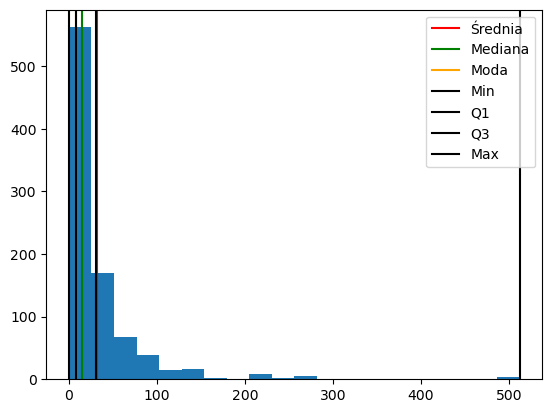

In [39]:
plt.hist(fares, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

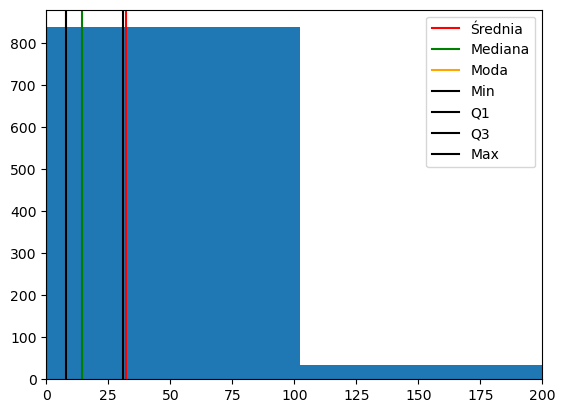

In [42]:
plt.hist(fares, bins=5)
plt.xlim(0, 200)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

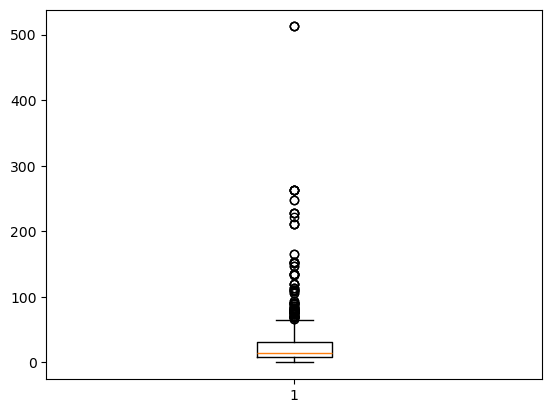

In [37]:
plt.boxplot(fares)
plt.show()

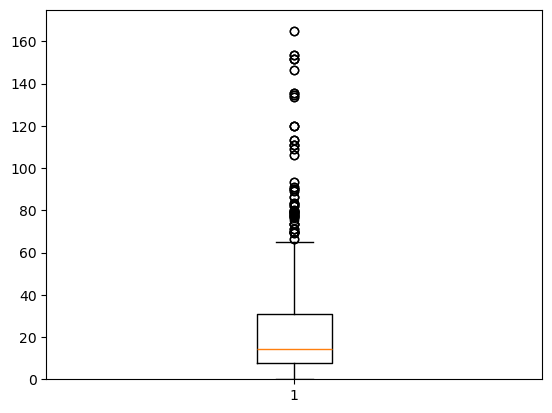

In [45]:
plt.boxplot(fares)
plt.ylim(0,175)
plt.show()